# Exploring Pokemon Data
In this Notebook, we will be exploring our first dataset - the [Pokemon](https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420) data. In the process of exploring this data, we will be covering basics on reading, processing, analyzing, and visualizing simple tabular datasets.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply go through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, email your instructor.

## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with 'Question #' on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* The notebooks will undergo a 'Restart and Run All' command, so make sure that your code is working properly.
* You are expected to understand the dataset loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

## `pandas` and `matplotlib`
* **`pandas`** is a software library for Python that is designed for data manipulation and data analysis. 
* **`matplotlib`** is a software libary for data visualization, which allows us to easily render various types of graphs. 

We will be using these two libraries in this Notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sets the theme of the charts
plt.style.use('seaborn-darkgrid')

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


The `%pylab inline` command allows for the visualization charts from `matplotlib` to be automatically rendered and displayed in the Notebook.

Additionally, you can also customize or choose the theme you'd like to use with `matplotlib` using the `plt.style.use()` command. See the [style sheet s reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) from `matplotlib` for more options.

## The Dataset
For this notebook, we will working on a dataset called `pokemon`. This dataset contains 890 known pokemon until 8th Generation and its varieties.

The dataset is provided to you as a `.csv` file. `.csv` means comma-separated values. You can open the file in Notepad to see how it is exactly formatted.

**Question #1:** What does random sample mean in this case?
- Random sample means to take a sample without any conditions nor patterns, which results in all samples having equal chance of being chosen.

If you view the `.csv` file in Excel, you can see that our dataset contains many **observations** (rows) across 48 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`pokedex_number`**: entry number of the Pokemon in the National Pokedex
- **`name`**: English name of the Pokemon
- **`generation`**: numbered generation which the Pokemon was first introduced
- **`status`**: denotes if the Pokemon is normal, sub legendary, legendary or mythical
- **`species`**: category of the Pokemon
- **`type_number`**: number of types that the Pokemon has
- **`type_1`**: primary type of the Pokemon
- **`type_2`**: secondary type of the Pokemon (if any)
- **`height_m`**: height of the Pokemon in meters
- **`weight_kg`**: weight of the Pokemon in kilograms
- **`abilities_number`**: the number of abilities of the Pokemon
- **`ability_1`**: ability of the Pokemon
- **`ability_2`**: another ability of the Pokemon (if any)
- **`ability_hidden`**: hidden ability of the Pokemon (if any)
- **`total_points`**: total number of base points
- **`hp`**: base HP of the Pokemon
- **`attack`**: base attack of the Pokemon
- **`defense`**: base defense of the Pokemon
- **`sp_attack`**: base special attack of the pokemon
- **`sp_defense`**: base special defense of the Pokemon
- **`speed`**: base speed of the Pokemon
- **`catch_rate`**: catch rate of the Pokemon
- **`base_friendship`**: base friendship of the Pokemon
- **`base_experience`**: base experience of a wild Pokemon when caught
- **`growth_rate`**: growth rate of the Pokemon
- **`egg_type_number`**: number of groups where a Pokemon can hatch
- **`egg_type_1`**: name of an egg group where a Pokemon can hatch
- **`egg_type_2`**: name of an egg group where a Pokemon can hatch
- **`percentage_male`**: percentage of the species that are male, blank if the Pokemon is genderless.
- **`egg_cycles`**: number of cycles (255-257 steps) required to hatch an egg of the Pokemon
- **`against_normal`**: denote the amount of damage taken against an attack of a normal Pokemon
- **`against_fire`**: denote the amount of damage taken against an attack of a fire Pokemon
- **`against_water`**: denote the amount of damage taken against an attack of a water Pokemon
- **`against_electric`**: denote the amount of damage taken against an attack of an electric Pokemon
- **`against_grass`**: denote the amount of damage taken against an attack of a grass Pokemon
- **`against_ice`**: denote the amount of damage taken against an attack of an ice Pokemon
- **`against_fight`**: denote the amount of damage taken against an attack of a fighting Pokemon
- **`against_poison`**: denote the amount of damage taken against an attack of a poison Pokemon
- **`against_ground`**: denote the amount of damage taken against an attack of a ground Pokemon
- **`against_flying`**: denote the amount of damage taken against an attack of a flying Pokemon
- **`against_psychic`**: denote the amount of damage taken against an attack of a psychic Pokemon
- **`against_bug`**: denote the amount of damage taken against an attack of a bug Pokemon
- **`against_rock`**: denote the amount of damage taken against an attack of a rock Pokemon
- **`against_ghost`**: denote the amount of damage taken against an attack of a ghost Pokemon
- **`against_dragon`**: denote the amount of damage taken against an attack of a dragon Pokemon
- **`against_dark`**: denote the amount of damage taken against an attack of a dark Pokemon
- **`against_steel`**: denote the amount of damage taken against an attack of a steel Pokemon
- **`against_fairy`**: denote the amount of damage taken against an attack of a fairy Pokemon

## Reading the Dataset

Our first step is to load the dataset using `pandas`. This will load the dataset into a pandas `DataFrame`. To load the dataset, we use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. Note that you may need to change the path depending on the location of the file in your machine.

In [2]:
pokemon_df = pd.read_csv('pokemon.csv')

In [39]:
#Extra
catch_rate = pokemon_df.groupby('type_1').agg({'catch_rate': ['min', 'max', 'mean', 'median']})
catch_rate.sort_values(('catch_rate', 'median'), ascending=False)

catch_rate                          
                min    max        mean median
type_1                                       
Fairy          25.0  225.0  116.944444  130.0
Poison         45.0  255.0  124.027778   90.0
Normal          3.0  255.0  117.801802   90.0
Ground          3.0  255.0  104.972222   82.5
Bug             3.0  255.0  111.384615   75.0
Fighting        3.0  225.0   98.161290   75.0
Ice             3.0  255.0   99.862069   75.0
Ghost           3.0  225.0   86.783784   60.0
Grass           3.0  255.0  100.855422   60.0
Electric        3.0  235.0   94.470588   60.0
Water           3.0  255.0   94.288000   60.0
Dark            3.0  255.0   92.416667   52.5
Fire            3.0  255.0   71.000000   45.0
Dragon          3.0   75.0   31.459459   45.0
Psychic         3.0  255.0   76.597015   45.0
Rock            3.0  255.0   73.785714   45.0
Steel           3.0  255.0   55.068966   45.0
Flying          3.0  190.0   60.250000   24.0

The dataset should now be loaded in the `pokemon_df` variable. `pokemon_df` is a [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). It is a data structure for storing tabular data, and the main data structure used in pandas.

Whenever we load a new dataset, it is generally a good idea to call the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, which displays general information about the dataset.

In [3]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   generation        1028 non-null   int64  
 3   status            1028 non-null   object 
 4   species           1028 non-null   object 
 5   type_number       1028 non-null   int64  
 6   type_1            1028 non-null   object 
 7   type_2            542 non-null    object 
 8   height_m          1028 non-null   float64
 9   weight_kg         1027 non-null   float64
 10  abilities_number  1028 non-null   int64  
 11  ability_1         1025 non-null   object 
 12  ability_2         513 non-null    object 
 13  ability_hidden    810 non-null    object 
 14  total_points      1028 non-null   int64  
 15  hp                1028 non-null   int64  
 16  attack            1028 non-null   int64  


**Question #2:** How many observations are there in the dataset?
- 1028

**Question #3:** How many variables are there in the dataset?
- 48

**Question #4:** What is the data type of the `growth_rate` column?
- object

**Question #5:** What is the data type of the `hp` column?
- int64

We can call the [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) function to display the first `n` rows of the dataset.

In [4]:
pokemon_df.head(10)

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Seed Pokemon,2,Grass,Poison,0.7,6.9,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pokemon,2,Grass,Poison,1.0,13.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pokemon,2,Grass,Poison,2.0,100.0,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Seed Pokemon,2,Grass,Poison,2.4,155.5,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Lizard Pokemon,1,Fire,NaN,0.6,8.5,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
5,5,Charmeleon,1,Normal,Flame Pokemon,1,Fire,NaN,1.1,19.0,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,6,Charizard,1,Normal,Flame Pokemon,2,Fire,Flying,1.7,90.5,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
7,6,Mega Charizard X,1,Normal,Flame Pokemon,2,Fire,Dragon,1.7,110.5,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,6,Mega Charizard Y,1,Normal,Flame Pokemon,2,Fire,Flying,1.7,100.5,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,7,Squirtle,1,Normal,Tiny Turtle Pokemon,1,Water,NaN,0.5,9.0,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


We can call also call the [`tail`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) function to display the last `n` rows of the dataset.

Use the tail function to find out what is the `carrier` of the **last** row in the dataset.

In [5]:
# Write your code here
pokemon_df.tail(1)

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1027,890,Eternatus Eternamax,8,Legendary,Gigantic Pokemon,2,Poison,Dragon,100.0,NaN,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


**Question #6:** What is/are the type/s of the Pokemon in last row of the dataset?
- type_1 is Poison, and type_2 is Dragon

We can get the columns of the dataset by accessing the [`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) property of the `DataFrame`.

In [6]:
pokemon_df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'species',
       'type_number', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'abilities_number', 'ability_1', 'ability_2', 'ability_hidden',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'base_friendship', 'base_experience',
       'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2',
       'percentage_male', 'egg_cycles', 'against_normal', 'against_fire',
       'against_water', 'against_electric', 'against_grass', 'against_ice',
       'against_fight', 'against_poison', 'against_ground', 'against_flying',
       'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
       'against_dragon', 'against_dark', 'against_steel', 'against_fairy'],
      dtype='object')

## Exploratory Data Analysis

The `pokemon` dataframe is a massive trove of information. Let's think about some questions we might want to answer with these data.

### Which type has the highest number of Pokemons?

To answer this question, the variable of interest is:
- **`type_1`**: primary type of the Pokemon

We can select a specific column from a `DataFrame` as a `Series` by using square brackets. For example, we can get the primary type of various Pokemon in the dataset by accessing the `type_1` column:

In [7]:
pokemon_df["type_1"]

0          Grass
1          Grass
2          Grass
3          Grass
4           Fire
          ...   
1023       Fairy
1024    Fighting
1025    Fighting
1026      Poison
1027      Poison
Name: type_1, Length: 1028, dtype: object

Note that the data type of the column above is a `Series`.

In [8]:
type(pokemon_df["type_1"])

pandas.core.series.Series

Count the number of pokemon per primary type.

In [9]:
type_count_df = pokemon_df['type_1'].value_counts()
type_count_df

Water       134
Normal      115
Grass        91
Bug          81
Psychic      76
Fire         65
Electric     61
Rock         60
Dark         44
Ground       41
Ghost        41
Dragon       40
Poison       39
Fighting     38
Ice          36
Steel        36
Fairy        22
Flying        8
Name: type_1, dtype: int64

In [11]:
#ALTERNATIVE
pokemon_df.groupby('type_1')['pokedex_number'].count()

type_1
Bug          81
Dark         44
Dragon       40
Electric     61
Fairy        22
Fighting     38
Fire         65
Flying        8
Ghost        41
Grass        91
Ground       41
Ice          36
Normal      115
Poison       39
Psychic      76
Rock         60
Steel        36
Water       134
Name: pokedex_number, dtype: int64

**Question #7:** How many dark Pokemons are there in the dataset?
- 44

Bar plots are used to show the count of each value. They are only used for categorical data. Use the [`bar`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) function.

Let's create a plot to show the count per primary type of Pokemon.

Text(0.5, 1.0, 'Pokemon count per primary type')

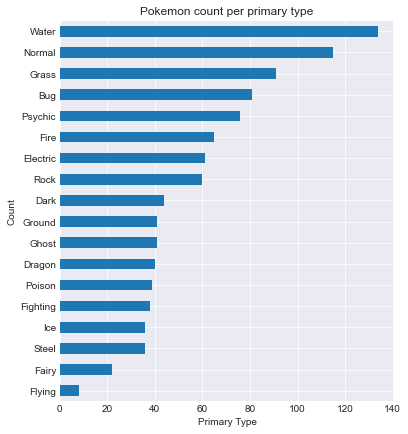

In [10]:
type_count_df.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Pokemon count per primary type')

**Question #8:** What are the top 3 types with the highest Pokemon count?
- Water, Normal, Grass

**Question #9:** What is the type with the least Pokemon count?
- Flying

### What is the average base HP of a specific type of Pokemon?

To answer this question, the variables of interest are:
- **`type_1`**: primary type of the Pokemon
- **`hp`**: base HP of the Pokemon

Write code to select the `hp` column as a series.

In [11]:
# Write your code here
pokemon_df['hp']

0        45
1        60
2        80
3        80
4        39
       ... 
1023     92
1024     92
1025     92
1026    140
1027    255
Name: hp, Length: 1028, dtype: int64

**Question #10:** What is the `hp` of the index 1023 Pokemon? Limit to 2 decimal places.
- 92

We can also select a list of columns from the dataset by providing a list instead of the name of a single column. For example, we can select both the `type_1` and `hp` columns at the same time as follows:

In [12]:
pokemon_df[["type_1", "hp"]]

,type_1,hp
0,Grass,45
1,Grass,60
2,Grass,80
3,Grass,80
4,Fire,39
...,...,...
1023,Fairy,92
1024,Fighting,92
1025,Fighting,92
1026,Poison,140


Note that by doing this, we are getting a `DataFrame` (albeit a smaller one) instead of a `Series`.

In [13]:
type(pokemon_df[["type_1", "hp"]])

pandas.core.frame.DataFrame

A good way to get an understanding of numerical values in the dataset is to use a histogram. Let's use a histogram to visualize the weight of all Pokemons in the dataset. To do this, we will call the [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function of the `DataFrame` which in turn calls the appropriate matplotlib function.

Note that we also call the [`show`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html) function of matplotlib to display only the graph.

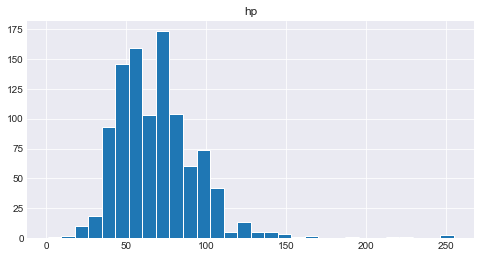

In [14]:
pokemon_df.hist("hp", bins=30, edgecolor='w', figsize=(8, 4))
plt.show()   # explicit call to show the chart (not needed with the pylab inline command)
# x is hp, y is frequency of hp count

You can play around the `bins` parameter by changing its value above.

Let's say we want to investigate the base HP for normal Pokemons only. To do this, we have to consider **only the observations in which the `type_1` is `Normal`**.

In [15]:
pokemon_df[pokemon_df["type_1"] == "Normal"]

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
20,16,Pidgey,1,Normal,Tiny Bird Pokemon,2,Normal,Flying,0.3,1.8,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
21,17,Pidgeotto,1,Normal,Bird Pokemon,2,Normal,Flying,1.1,30.0,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
22,18,Pidgeot,1,Normal,Bird Pokemon,2,Normal,Flying,1.5,39.5,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
23,18,Mega Pidgeot,1,Normal,Bird Pokemon,2,Normal,Flying,2.2,50.5,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
24,19,Rattata,1,Normal,Mouse Pokemon,1,Normal,NaN,0.3,3.5,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,780,Drampa,7,Normal,Placid Pokemon,2,Normal,Dragon,3.0,185.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0
949,819,Skwovet,8,Normal,Cheeky Pokemon,1,Normal,NaN,0.3,2.5,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
950,820,Greedent,8,Normal,Greedy Pokemon,1,Normal,NaN,0.6,6.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
961,831,Wooloo,8,Normal,Sheep Pokemon,1,Normal,NaN,0.6,6.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


As you can see, the above query resulted into a new `DataFrame` containing only the Pokemons where `type_1` is `Normal`. For now, we will assign this new `DataFrame` into a new variable for convenience.

In [17]:
normal_pokemon_df = pokemon_df[pokemon_df["type_1"] == "Normal"]

Plot a histogram of the base HP of normal Pokemons.

Text(0, 0.5, 'Frequency')

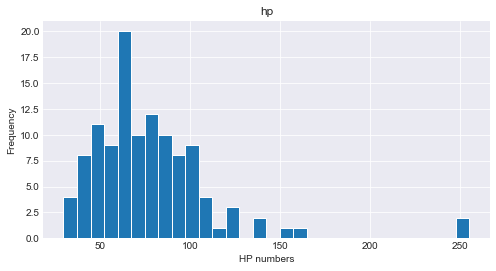

In [18]:
# Write your code here
normal_pokemon_df.hist("hp", bins=30, edgecolor='w', figsize=(8, 4))
plt.xlabel('HP numbers')
plt.ylabel('Frequency')

**Question #11:** Which best describes the shape of the distribution of the base HP of normal Pokemons? (a) symmetric (b) positively-skewed (c) negatively-skewed (d) uniform
- Positively-skewed

We can also aggregate some summary statistics regarding the base HP using the [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function. Note that for this function, we pass a dictionary where the key is a column name and the corresponding value is a list of functions that we want to apply to that column. We can pass either an actual function **or** a string containing the name of a common function such as `"mean"` or `"std"`. 

Get the mean, standard deviation and length of the `hp` column.

In [19]:
normal_pokemon_df.agg({"hp": ["mean", "std", "count"]})

,hp
mean,77.052174
std,34.631606
count,115.000000


**Question #12:** What is the average base HP of normal Pokemons? Limit to 2 decimal places.
- 77.05

Next, let's try to do the same thing for normal Pokemons which were introduced on or before the 5th generation. We can filter observations using multiple criteria by using `&` (and) and `|` (or). Note that these are not the normal `and` and `or` operators in Python. These are bitwise operators that perform element-wise operations on two boolean lists. 

In [20]:
normal_pokemon_5thgen_df = pokemon_df[(pokemon_df["type_1"] == "Normal") & (pokemon_df["generation"] <= 5)]
normal_pokemon_5thgen_df

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
20,16,Pidgey,1,Normal,Tiny Bird Pokemon,2,Normal,Flying,0.3,1.8,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
21,17,Pidgeotto,1,Normal,Bird Pokemon,2,Normal,Flying,1.1,30.0,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
22,18,Pidgeot,1,Normal,Bird Pokemon,2,Normal,Flying,1.5,39.5,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
23,18,Mega Pidgeot,1,Normal,Bird Pokemon,2,Normal,Flying,2.2,50.5,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
24,19,Rattata,1,Normal,Mouse Pokemon,1,Normal,NaN,0.3,3.5,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,626,Bouffalant,5,Normal,Bash Buffalo Pokemon,1,Normal,NaN,1.6,94.6,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
726,627,Rufflet,5,Normal,Eaglet Pokemon,2,Normal,Flying,0.5,10.5,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
727,628,Braviary,5,Normal,Valiant Pokemon,2,Normal,Flying,1.5,41.0,...,0.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,1.0,1.0
753,648,Meloetta Aria Forme,5,Mythical,Melody Pokemon,2,Normal,Psychic,0.6,6.5,...,1.0,1.0,0.5,2.0,1.0,0.0,1.0,2.0,1.0,1.0


Use the `agg` function to determine the **median** base HP of normal Pokemons introduced on or before the 5th generation.

In [21]:
# Write your code here
normal_pokemon_5thgen_df.agg({"hp": "median"})
# normal_pokemon_5thgen_df['hp'].median()

hp    70.0
dtype: float64

**Question #13:** What is the median base HP of normal Pokemons introduced on or before the 5th generation? Limit to 2 decimal places.
- 70

### Which type has the highest average base attack?

To answer this question, the variables of interest are:
- **`type_1`**: primary type of the Pokemon
- **`attack`**: base attack of the Pokemon

Sometimes, we may want to form groups in the datasets and compute summary statistics for each group. For instance, to determine which type has a highest average base attack in the dataset, we need to compute the average for each type.

To do this, we can use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function. The function will group the dataset using the value of the provided column name.

In [22]:
pokemon_df.groupby("type_1")

Get the mean and standard deviation of the base attack per Pokemon type.

In [23]:
pokemon_df.groupby("type_1").agg({"attack": ["mean", "std"]})

attack           
                mean        std
type_1                         
Bug        71.074074  37.546231
Dark       81.000000  28.408155
Dragon    107.200000  33.234366
Electric   74.573770  24.471384
Fairy      68.090909  37.938433
Fighting  101.263158  27.410478
Fire       85.400000  27.457239
Flying     75.125000  27.689284
Ghost      74.195122  28.645436
Grass      74.813187  29.331027
Ground     94.121951  31.464420
Ice        76.638889  31.689703
Normal     75.260870  29.639970
Poison     75.538462  20.041859
Psychic    74.934211  42.136393
Rock       91.783333  33.662881
Steel      94.083333  29.246123
Water      74.992537  28.882832

You can sort a `DataFrame` by a column using the `sort_values` function. Sort the resulting table above in descending order to easily see which type has the highest average base attack.

In [24]:
mean_df = pokemon_df.groupby("type_1").agg({"attack": ["mean", "std"]})
mean_df.sort_values(("attack", "mean"), ascending=False)

attack           
                mean        std
type_1                         
Dragon    107.200000  33.234366
Fighting  101.263158  27.410478
Ground     94.121951  31.464420
Steel      94.083333  29.246123
Rock       91.783333  33.662881
Fire       85.400000  27.457239
Dark       81.000000  28.408155
Ice        76.638889  31.689703
Poison     75.538462  20.041859
Normal     75.260870  29.639970
Flying     75.125000  27.689284
Water      74.992537  28.882832
Psychic    74.934211  42.136393
Grass      74.813187  29.331027
Electric   74.573770  24.471384
Ghost      74.195122  28.645436
Bug        71.074074  37.546231
Fairy      68.090909  37.938433

Note that `sort_value` accepts the variable name you want to sort as the parameter. In this case, we pass in the **tuple** `("attack", "mean")` because if you look at the `DataFrame` in the previous cell, we have a hierharchical structure for the column names where the first level is `attack`, and the `mean` column is under that column.

**Question #14:** Which type has the highest average base attack?
- Dragon

Find out which type has the highest median base attack. Make sure to sort the median values per type in descending order.

In [25]:
# Write your code here
median_df = pokemon_df.groupby("type_1").agg({"attack": "median"})
median_df.sort_values("attack", ascending=False)

,attack
type_1,
Fighting,102.5
Dragon,100.0
Rock,95.0
Ground,95.0
Steel,90.0
Dark,85.0
Fire,84.0
Flying,77.5
Normal,75.0


**Question #15:** If you can choose which Pokemon type to use, using only the base attack as the basis for your decision, which type has the **highest** base attack?
- Fighting

**Question #16:** In choosing the best Pokemon type according to base attack (previous question), would it be better to use mean or median? Why?
- mean, because the median can be considered inconsistent due to it being the middle element of all values, by using mean we are assured that the values are consistently high.

We can also visualize the base attack per type by using a side-by-side boxplot from the [`boxplot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function of matplotlib. Notice that you can control the size of the figures in matplotlib using the `figsize` parameter (also works in other plots).

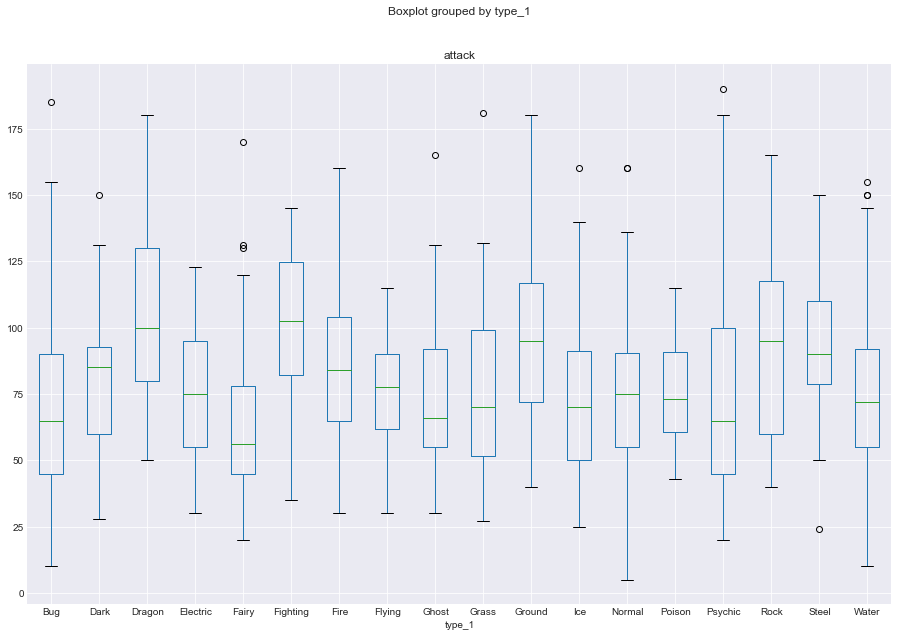

In [27]:
pokemon_df.boxplot("attack", by="type_1", figsize=(15,10))
plt.show()

### Which type has the highest average base defense?

To answer this question, the variables of interest are:
- **`type_1`**: primary type of the Pokemon
- **`defense`**: base defense of the Pokemon

Get the mean and standard deviation of the base defense per Pokemon type.

In [31]:
# Write your code here
mean_std_def = pokemon_df.groupby("type_1").agg({"defense": ["mean","std"]})

Sort the resulting table above in descending order to easily see which type has the highest average base defense.

In [32]:
# Write your code here
mean_std_def.sort_values(("defense", "mean"), ascending=False)

defense           
                mean        std
type_1                         
Steel     117.388889  44.467823
Rock       97.966667  38.894890
Ground     85.463415  33.532147
Dragon     84.775000  25.787581
Ghost      80.439024  30.427823
Poison     76.179487  37.797154
Water      73.119403  27.893742
Fighting   72.210526  23.164696
Grass      71.824176  24.312134
Bug        71.802469  34.409817
Ice        71.083333  31.089158
Psychic    70.986842  28.431669
Fairy      70.545455  23.345699
Fire       68.107692  24.386294
Electric   66.508197  22.639658
Dark       64.977273  24.920794
Flying     64.375000  24.118384
Normal     61.173913  23.649213

**Question #17:** Which type has the highest average base defense?
- Steel

Find out which type has the highest median base defense. Make sure to sort the median values per type in descending order.

In [34]:
# Write your code here
median_def = pokemon_df.groupby("type_1").agg({"defense": "median"})
median_def.sort_values("defense", ascending=False)

,defense
type_1,
Steel,115.0
Rock,98.5
Dragon,90.0
Ground,85.0
Ghost,75.0
Fighting,75.0
Grass,70.0
Ice,70.0
Water,70.0


**Question #18:** Which type has the highest median base defense? What is its median base defense? Limit to 2 decimal places.
- Steel, 115.0

Visualize the base defense per type by using a side-by-side boxplot from the [`boxplot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function of matplotlib. 

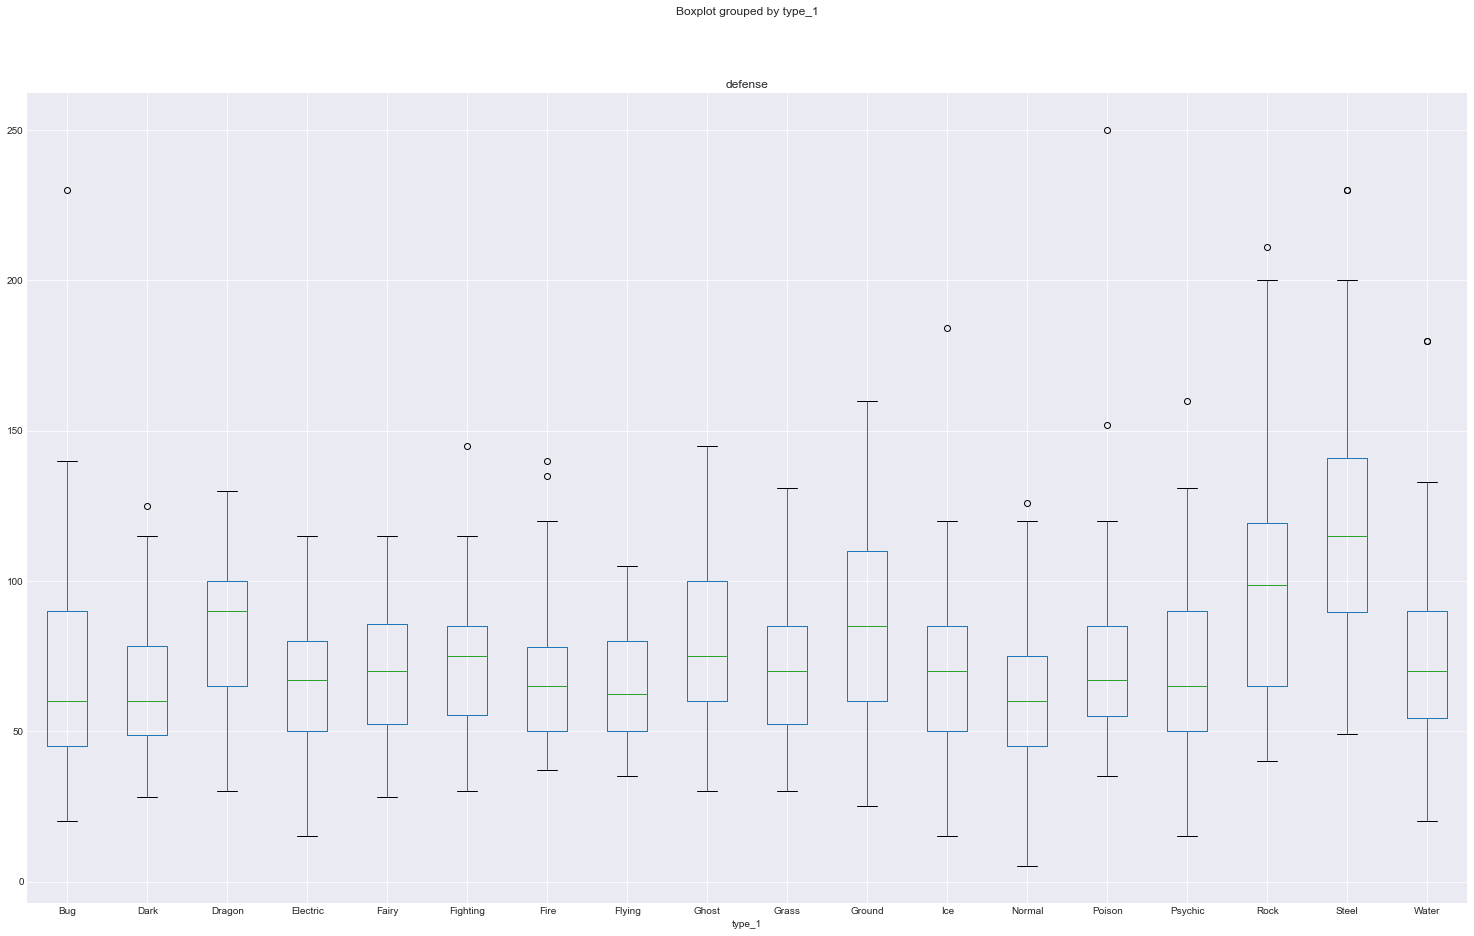

In [39]:
# Write your code here
boxplot_def = pokemon_df.boxplot("defense", by="type_1", figsize=(25,15))

**Question #19:** Which type/s has/have the lowest lower whisker?
- Normal

**Question #20:** Which type/s has/have the highest upper whisker?
- Rock, Steel

### Is there a relationship between `hp`, `attack`, `defense`?

To answer this question, the variables of interest are:
- **`hp`**: base HP of the Pokemon
- **`attack`**: base attack of the Pokemon
- **`defense`**: base defense of the Pokemon

In [40]:
hp_atk_def = pokemon_df[['hp', 'attack', 'defense']]
hp_atk_def

,hp,attack,defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43
...,...,...,...
1023,92,130,115
1024,92,130,145
1025,92,130,115
1026,140,85,95


When we want to understand the relationship of different variables, typically numerical/continuous variables, we can get the correlation between the variables and check how they are related.

In [41]:
hp_atk_def.corr()

,hp,attack,defense
hp,1.000000,0.442992,0.302593
attack,0.442992,1.000000,0.450766
defense,0.302593,0.450766,1.000000


`pandas` has a built in `corr()` function which computes for the Pearson's correlation coefficient. The table created is called a correlation matrix.

A good way to get a visual of the relationship of two variables is to use a scatter plot. Let's use a scatter plot to visualize the relationship of the HP and the attack stat of all Pokemons in the dataset.

To do this, we can call the `scatter` function.

Text(0.5, 1.0, 'Relationship of Pokemon HP and Attack')

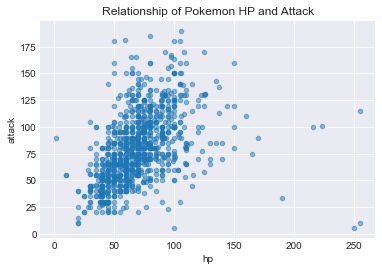

In [43]:
hp_atk_def.plot.scatter(x='hp', y='attack', alpha=0.5)
plt.title('Relationship of Pokemon HP and Attack')

From the correlation matrix above, the correlation of HP and attack is **0.442992**. It has a positive relationship, which means that as one value increases, the other value also increases. 

In most cases, to test whether the correlation is significant or not, a statistical test is performed. 

Now, let's look at the relationship of the Pokemons' HP and defense. 

Visualize the HP and defense of all Pokemons using a scatter plot.

Text(0.5, 1.0, 'Relationship of Pokemon HP and Defense')

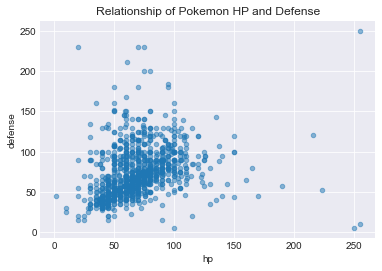

In [44]:
# Write your code here
hp_atk_def.plot.scatter(x='hp', y='defense', alpha=0.5)
plt.title('Relationship of Pokemon HP and Defense')

**Question #21:** What is the correlation of HP and defense? Limit to 4 decimal places.

- 0.3026

**Question #22:** What is the correlation of attack and defense? Limit to 4 decimal places.

- 0.4508

**Question #23:** What can you say about the correlation of attack and defense? (a) positively correlated, (b) negatively correlated

- positively correlated

### Is there a relationship between the `speed` and the `catch_rate` of the Pokemon?

To answer this question, the variables of interest are:
- **`speed`**: base speed of the Pokemon
- **`catch_rate`**: catch rate of the Pokemon

Get the correlation of `speed` and `catch_rate` of all Pokemon. Select the columns first before running the correlation function.

In [45]:
# Write your code here
speed_catchrate = pokemon_df[['speed', 'catch_rate']]
speed_catchrate.corr()

,speed,catch_rate
speed,1.000000,-0.416719
catch_rate,-0.416719,1.000000


**Question #24:** What is the correlation of speed and catch rate? Limit to 4 decimal places.

- -0.4167

Visualize the speed and catch rate of all Pokemons using a scatter plot.

Text(0.5, 1.0, 'Relationship of Pokemon Speed and Catch Rate')

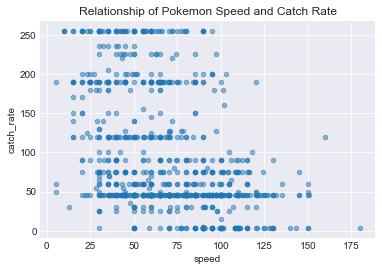

In [48]:
# Write your code here
speed_catchrate.plot.scatter(x='speed', y='catch_rate', alpha=0.5)
plt.title('Relationship of Pokemon Speed and Catch Rate')

**Question #25:** What can you say about the correlation of speed and catch rate? (a) positively correlated, (b) negatively correlated, (c) no relationship

- negatively correlated

## Conclusions

Given that the dataset is rich with information, there are a lot more information and relationships that you can extract from the dataset. Try looking at each variable and ask more questions that may interest you and visualize them to confirm or deny your initial hypothesis!